Think Stats Chapter 3 Exercise 1 (actual vs. biased)
3.6  Exercises
Solutions to these exercises are in chap03soln.ipynb and chap03soln.py

Exercise 1   Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

In [1]:
import math
import numpy as np
import nsfg
import thinkstats2
import thinkplot
import first

In [2]:
df = nsfg.ReadFemResp()
df.shape

(7643, 3087)

In [3]:
'numkdhh' in df.columns

True

In [4]:
df.numkdhh.value_counts()

0    3563
1    1636
2    1500
3     666
4     196
5      82
Name: numkdhh, dtype: int64

In [5]:
actual_pmf = thinkstats2.Pmf(df['numkdhh'],label='actual')
actual_pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'actual')

In [6]:
def BiasPmf(pmf, label):
  new_pmf = pmf.Copy(label=label)
  for x, p in pmf.Items():
    new_pmf.Mult(x, x)
  new_pmf.Normalize()
  return new_pmf
    
bias_pmf = {}
bias_pmf = BiasPmf(actual_pmf, 'biased')
bias_pmf

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'biased')

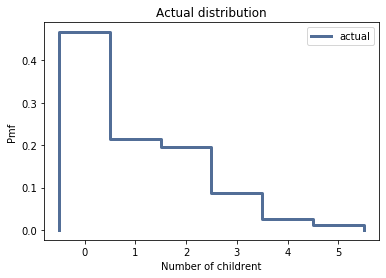

Actual distribution mean: 1.024205155043831


<Figure size 576x432 with 0 Axes>

In [10]:
thinkplot.Pmf(actual_pmf)
thinkplot.Show(xlabel='Number of childrent', ylabel='Pmf', 
               title='Actual distribution')
print('Actual distribution mean:', actual_pmf.Mean())

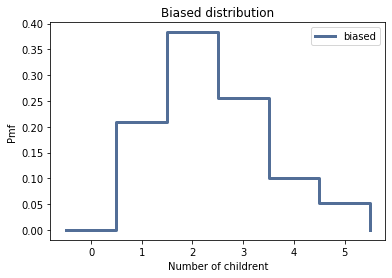

Biased distribution mean: 2.403679100664282


<Figure size 576x432 with 0 Axes>

In [9]:
thinkplot.Pmf(bias_pmf)
thinkplot.Show(xlabel='Number of childrent', ylabel='Pmf', 
               title='Biased distribution')
print('Biased distribution mean:', bias_pmf.Mean())